# Linear Regression with Scikit-Learn

This notebook demonstrates how to implement **Linear Regression** using Python and the `scikit-learn` library. 

We go through the full process:
1. **Generate synthetic data** with a known linear trend and noise.
2. **Visualize the data** to understand its structure.
3. **Split the dataset** into training and test sets.
4. **Train a Linear Regression model** using the training set.
5. **Evaluate the model** using Mean Squared Error and R² score.
6. **Visualize the regression line** and predictions.
7. **Make manual predictions** using learned weights.
8. **Plot residuals** to assess model fit.

This exercise helps you understand both the high-level usage of linear models and how the model behaves in practice.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Linear regression modeling and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

Set a random seed for reproducibility of results.

In [2]:
np.random.seed(42)

Generate a dataset with 100 samples, 1 feature, some noise, and a bias term using `make_regression`. 

Then we convert it to a DataFrame to easily inspect the first few rows.

In [3]:
X, y = make_regression(n_samples=100, n_features=1, noise=15.0, bias=50.0) 
df = pd.DataFrame({"Features": X.flatten(), "Target": y.flatten()})
print(df.head())

   Features      Target
0  0.931280  106.733566
1  0.087047   33.085375
2 -1.057711   19.697421
3  0.314247   59.231600
4 -0.479174   33.393064


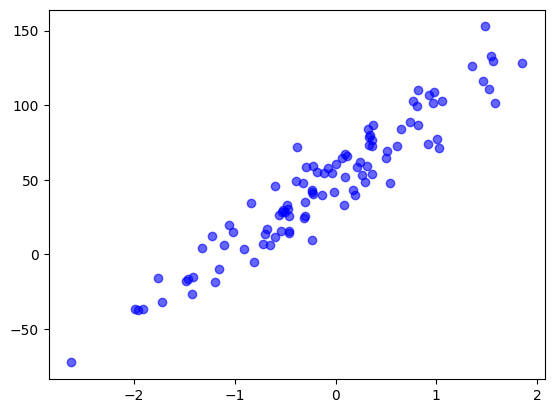

In [4]:
plt.scatter(X, y, color="blue", alpha=0.6)

Split the data into training and test sets using `train_test_split`. 
This helps evaluate the model on unseen data later.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (80, 1)
X_test shape: (20, 1)


Fit a `LinearRegression` model to the training data.

After training, display the learned coefficient (slope) and intercept (bias).

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

print(f"coef: {model.coef_[0]}") # weight 
print(f"intercept: {model.intercept_}") # bias

coef: 45.495723076522346
intercept: 50.14883332133881


In [7]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R2 score: {r2_score}")

MSE: 234.45500969670812
R2 score: 0.8741998178842183


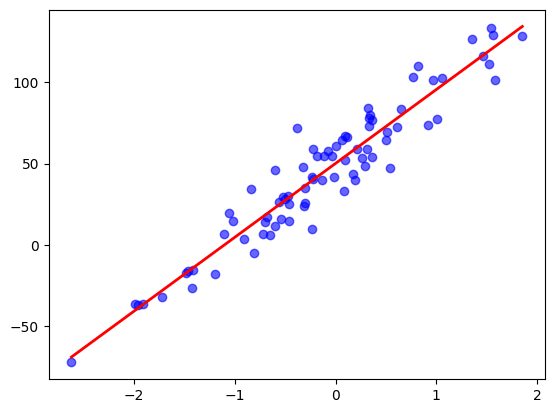

In [9]:
plt.scatter(X_train, y_train, color="blue", alpha=0.6)
x_min, x_max = X_train.min(), X_train.max()
y_min = model.coef_[0] * x_min + model.intercept_
y_max = model.coef_[0] * x_max + model.intercept_

plt.plot([x_min, x_max], [y_min, y_max], color="red", label="Regression Line", linewidth=2)

plt.show()

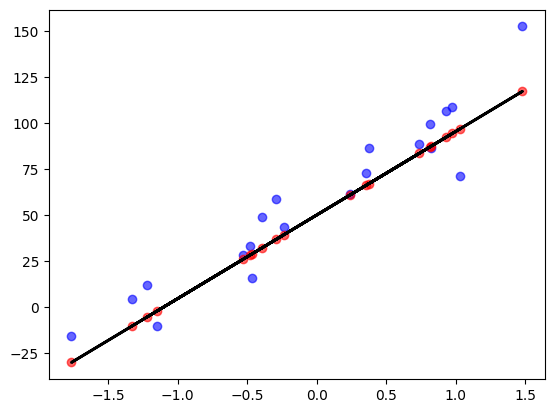

In [11]:
plt.scatter(X_test, y_test, color="blue", alpha=0.6)
plt.scatter(X_test, y_pred, color="red", alpha=0.6)
plt.plot(X_test, y_pred, color="black", label="Regression Line", linewidth=2)
plt.show()

In [12]:
sample_x = np.array([10])
predicted_y = model.coef_ * sample_x + model.intercept_
print(predicted_y)

[505.10606409]


Plot the residuals (errors) of predictions on the test set.
- A horizontal line at 0 helps visualize the spread of residuals.
- Ideally, residuals should be randomly scattered around 0.

![Residual Plot Example](https://condor.depaul.edu/sjost/it223/documents/resid-plots.gif)

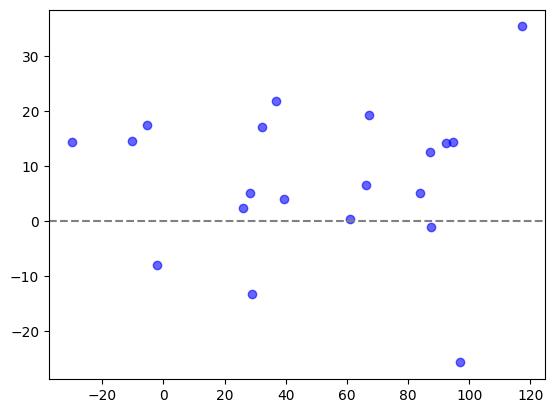

In [13]:
residual = y_test - y_pred
plt.scatter(y_pred, residual, color="blue", alpha=0.6)
plt.axhline(0, color="gray", linestyle="--")
plt.show()